In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten ,Dense

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
dataset = pd.read_csv('dataset/diabetes.csv')

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

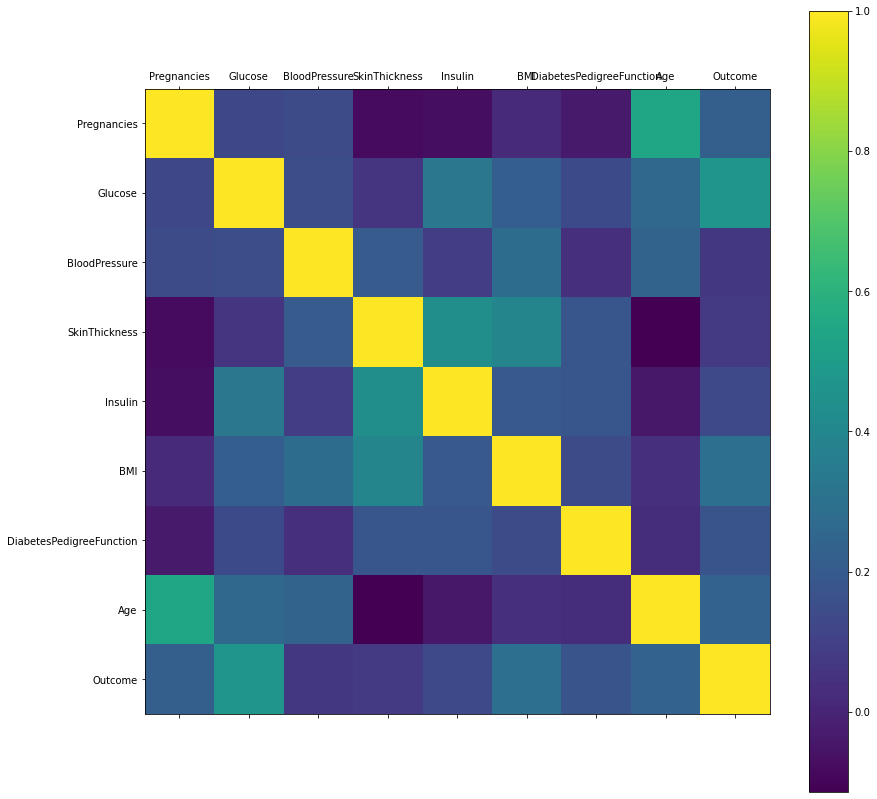

In [25]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

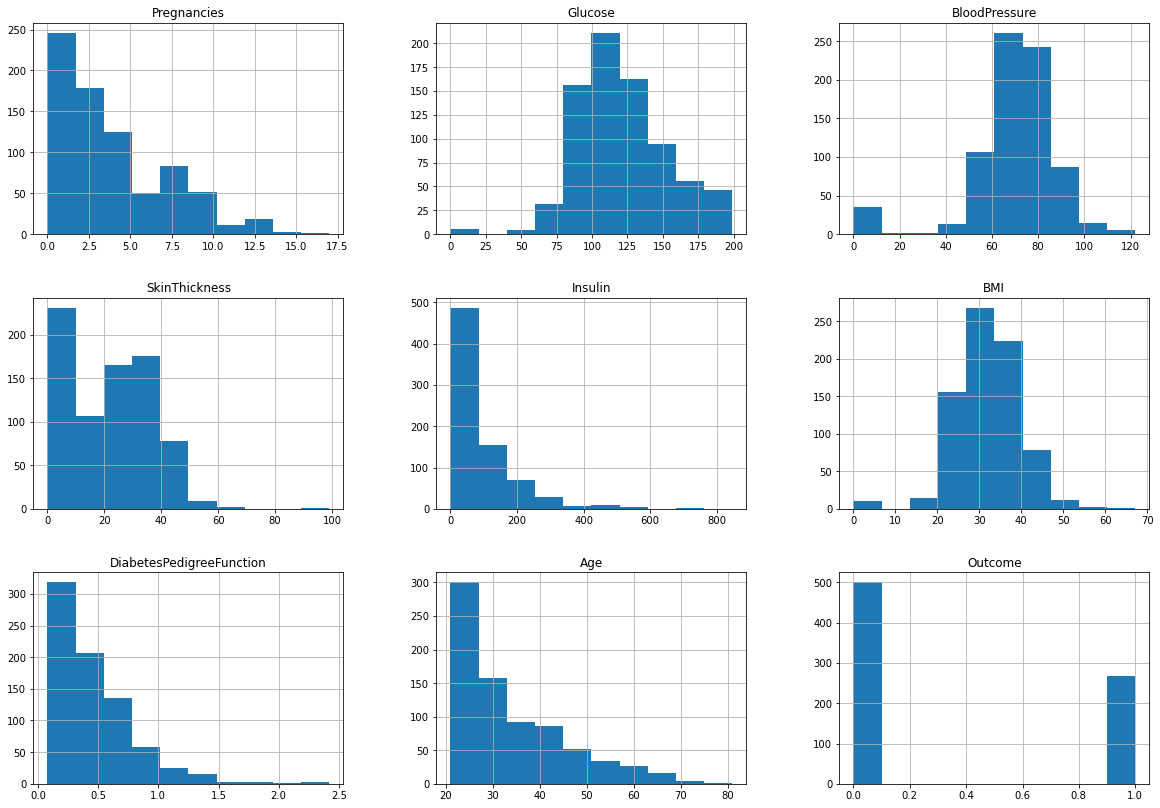

In [26]:
dataset.hist()


Text(0.5, 1.0, 'Count of each Target Class')

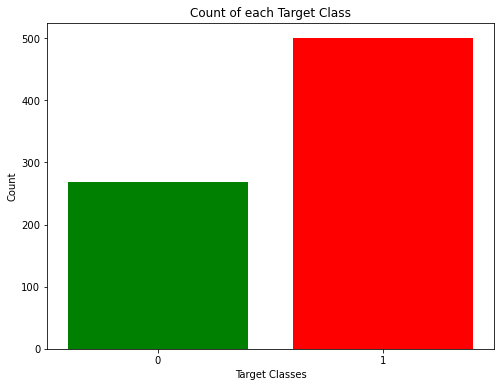

In [27]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['Outcome'].unique(), dataset['Outcome'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [28]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

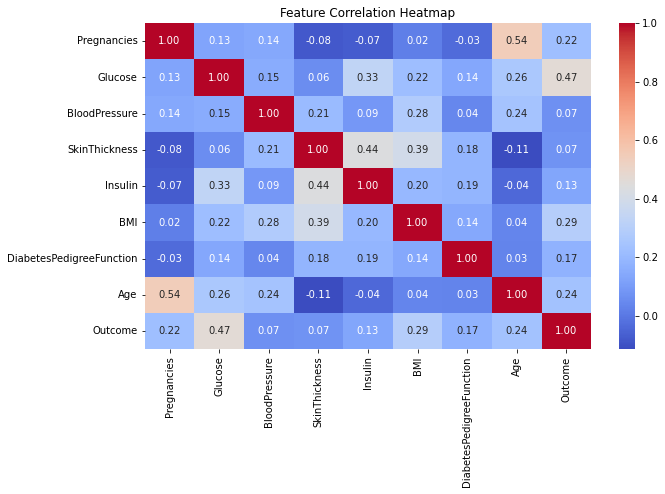

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [32]:
X = dataset.drop(columns=["Outcome"]) 

In [33]:
y = dataset["Outcome"] 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [37]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [38]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [39]:
svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [40]:
model = Sequential([
    Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [41]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [57]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
39/39 [==============================] - 0s 5ms/step - loss: 0.3852 - accuracy: 0.8094 - val_loss: 0.5307 - val_accuracy: 0.7727
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 0.3834 - accuracy: 0.8225 - val_loss: 0.5321 - val_accuracy: 0.7727
Epoch 3/100
39/39 [==============================] - 0s 4ms/step - loss: 0.3827 - accuracy: 0.8160 - val_loss: 0.5320 - val_accuracy: 0.7727
Epoch 4/100
39/39 [==============================] - 0s 4ms/step - loss: 0.3816 - accuracy: 0.8208 - val_loss: 0.5304 - val_accuracy: 0.7727
Epoch 5/100
39/39 [==============================] - 0s 4ms/step - loss: 0.3805 - accuracy: 0.8176 - val_loss: 0.5300 - val_accuracy: 0.7662
Epoch 6/100
39/39 [==============================] - 0s 4ms/step - loss: 0.3810 - accuracy: 0.8192 - val_loss: 0.5302 - val_accuracy: 0.7727
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - loss: 0.3796 - accuracy: 0.8274 - val_loss: 0.5297 - val_accuracy: 0.7662
Epoch 8/100
3

Epoch 59/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8485 - val_loss: 0.5494 - val_accuracy: 0.7597
Epoch 60/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8420 - val_loss: 0.5496 - val_accuracy: 0.7662
Epoch 61/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8420 - val_loss: 0.5514 - val_accuracy: 0.7662
Epoch 62/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8420 - val_loss: 0.5526 - val_accuracy: 0.7532
Epoch 63/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8453 - val_loss: 0.5501 - val_accuracy: 0.7532
Epoch 64/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8485 - val_loss: 0.5485 - val_accuracy: 0.7597
Epoch 65/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8436 - val_loss: 0.5503 - val_accuracy: 0.7597
Epoch 

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


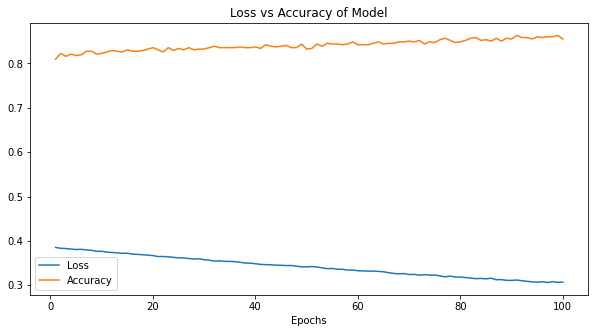

In [59]:
import matplotlib.pyplot as plt

epochs = range(1, 101) 
plt.figure(figsize=(10, 5))
plt.title("Loss vs Accuracy of Model")
plt.plot(epochs, history.history['loss'][:200], label='Loss')
plt.plot(epochs, history.history['accuracy'][:200], label='Accuracy')
plt.grid()
plt.xlabel("Epochs")
plt.grid()
plt.legend()
plt.show()

In [60]:
y_pred = (model.predict(X_test) > 0.5).astype(int) 

5/5 [==============================] - 0s 2ms/step


In [44]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Model Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix")
    plt.show()


Logistic Regression Model Evaluation
Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



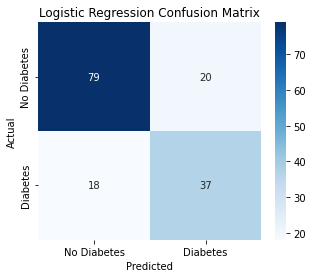


Decision Tree Model Evaluation
Accuracy: 0.7922077922077922
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



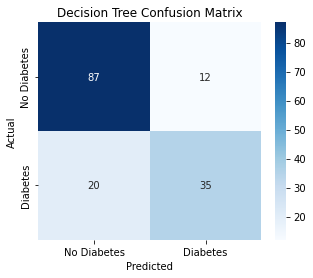


Random Forest Model Evaluation
Accuracy: 0.7207792207792207
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



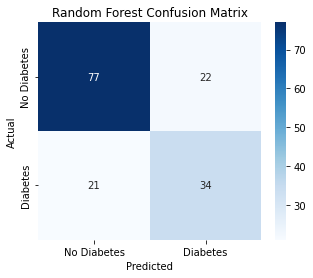


SVM Model Evaluation
Accuracy: 0.7337662337662337
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



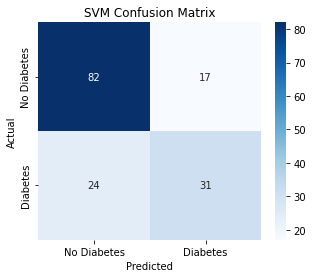


Neural Network Model Evaluation
Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



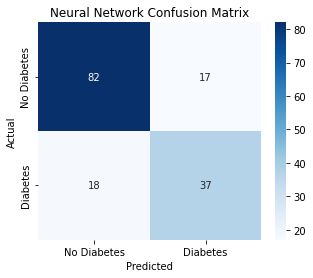

In [48]:
evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("SVM", y_test, svm_pred)
evaluate_model("Neural Network", y_test, y_pred)

In [49]:
def predict_diabetes(model, scaler, user_input):
    
    df = pd.DataFrame([user_input])
    df_scaled = scaler.transform(df) 
    prediction = model.predict(df_scaled)[0] if not isinstance(model, Sequential) else (model.predict(df_scaled)[0][0] > 0.5).astype(int)
    return "Diabetes Detected" if prediction == 1 else "No Diabetes"

In [50]:
patient_no_diabetes = {
    "Pregnancies": 1, "Glucose": 90, "BloodPressure": 72, "SkinThickness": 23, "Insulin": 50,
    "BMI": 22.5, "DiabetesPedigreeFunction": 0.3, "Age": 25
}

In [52]:
predict_diabetes(model, scaler, patient_no_diabetes)

1/1 [==============================] - 0s 22ms/step


'No Diabetes'

In [53]:
patient_diabetes = {
    "Pregnancies": 5, "Glucose": 180, "BloodPressure": 85, "SkinThickness": 35, "Insulin": 130,
    "BMI": 33.2, "DiabetesPedigreeFunction": 1.2, "Age": 50
}


In [55]:
predict_diabetes(model, scaler, patient_diabetes)

1/1 [==============================] - 0s 22ms/step


'Diabetes Detected'

In [63]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

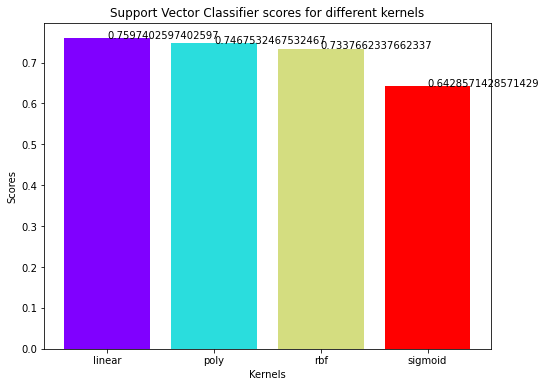

In [64]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [65]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 75.97402597402598% with linear kernel.


In [66]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

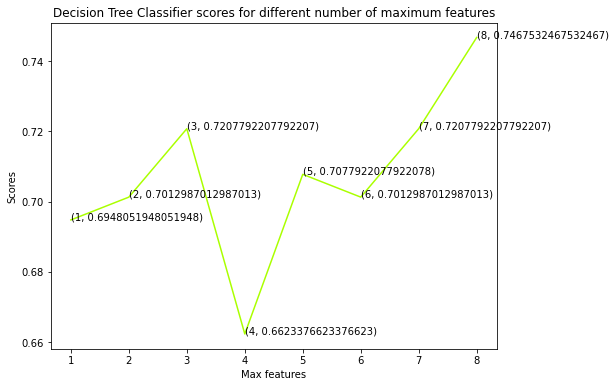

In [67]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = '#AAFF00')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [69]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[5]*100, [2,4,8]))

The score for Decision Tree Classifier is 70.12987012987013% with [2, 4, 8] maximum features.


In [70]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

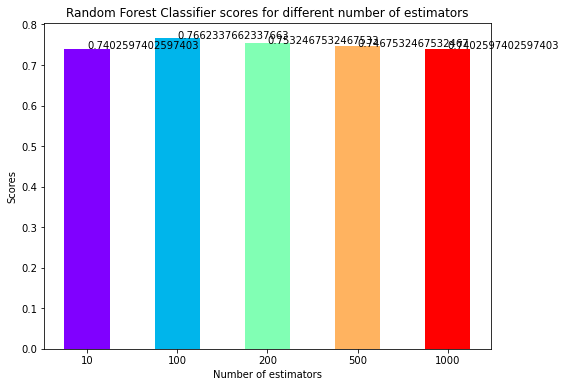

In [71]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.5)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [72]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 76.62337662337663% with [100, 500] estimators.


In [74]:
model.save("DiabetesDisease.h5")